## Monthly Short Term Interest Rate Prediction
Data: 1973 - 2023
Potential Predictors: 'Personal Income', 'Industrial Production', 'Money Supply- Currency/Demand Deposit/Traveller Check', 'Money Supply- Deposit'

In [1]:
#!pip install numpy pandas statsmodels matplotlib scikit-learn pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Use Dates as indexes

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() #allows using dates for indexing

In [3]:
# from interesrate.csv, read the following columns into df: Date, Short Term Interest Rates, Personal Income,	Consumer Prices(Inflation,)	Industrial Production,	Consumer Confidence,	Money Supply- Currency/Demand Deposit/Traveller Check,	Money Supply- Deposit
df = pd.read_csv('interestdata.csv', parse_dates=['Date'], index_col= ['Date'], usecols=['Date','Short Term Interest Rates', 'Personal Income', 'Industrial Production', 'Money Supply- Currency/Demand Deposit/Traveller Check', 'Money Supply- Deposit'])
df.dropna(inplace=True)

In [4]:
df.describe()

,Short Term Interest Rates,Personal Income,Industrial Production,Money Supply- Currency/Demand Deposit/Traveller Check,Money Supply- Deposit
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,4.972750,7.672099,77.161705,2528.172832,6467.017172
std,3.916447,37.325050,21.206874,4594.927097,5418.529386
min,0.090000,-81.049850,39.952099,257.899994,839.299988
25%,1.347500,3.371865,55.026525,631.425003,2528.050049
50%,5.150000,5.883719,85.067749,1117.599976,4248.150147
75%,7.030000,8.792834,98.016724,1876.699982,8901.050293
max,18.650000,867.957458,104.118103,20664.199220,21703.599610


## Comparison Plots

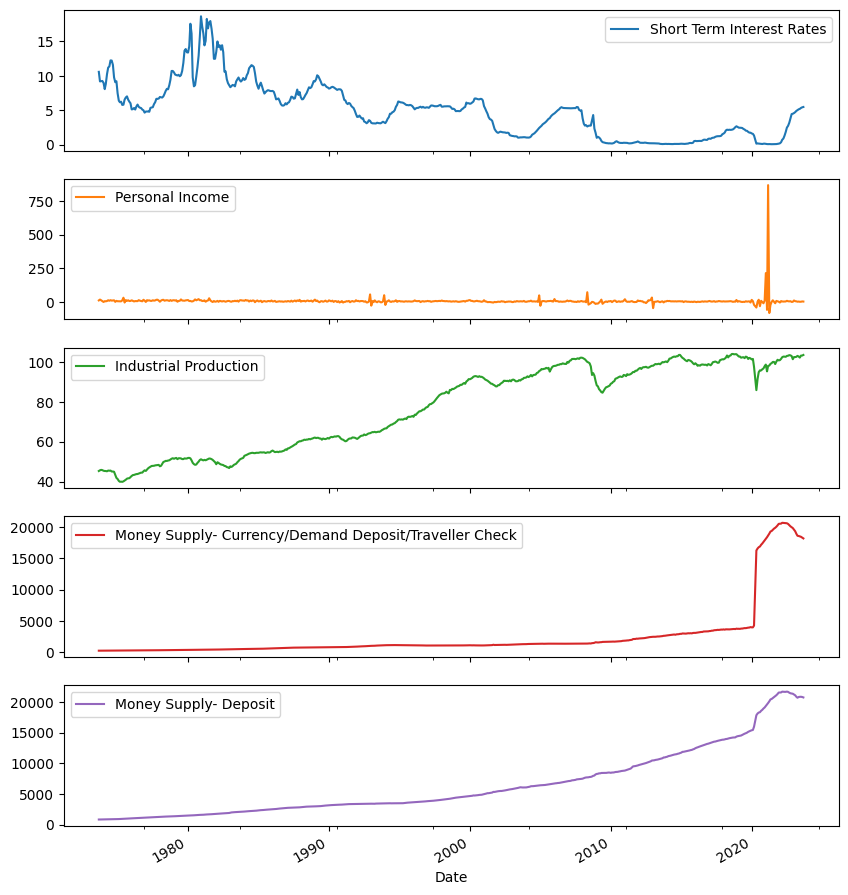

In [5]:
#plot the data all with dates on x-axis
df.plot(subplots= True, figsize=(10,12))
plt.show()

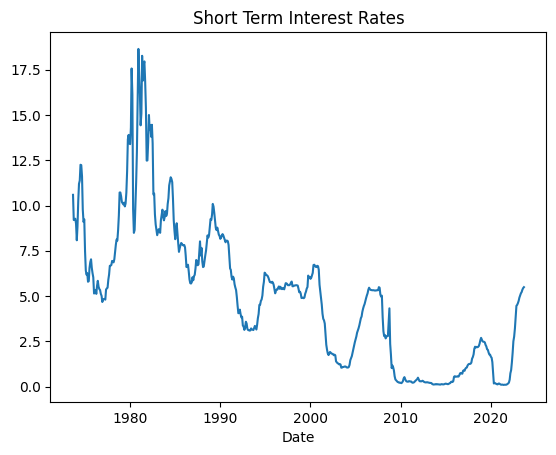

In [6]:
plt.plot(df.index, df['Short Term Interest Rates'])
plt.title ('Short Term Interest Rates')
plt.xlabel ('Date')
plt.show()

## Assessing Stationarity of Data
Augmented Dickey-Fuller (ADF) test: This is a statistical test that checks for the presence of a unit root in the time series data. A unit root indicates that the data is non-stationary. If the p-value of the test is less than a chosen significance level (e.g., 0.05), then the null hypothesis of a unit root is rejected and the data is considered stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Short Term Interest Rates'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.282625
p-value: 0.177633
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


We find that the data isnt stationary. To address that before going into our time-series modelling, we use Differencing: This involves taking the difference between consecutive observations in the time series. This can help remove trends and seasonality in the data.

In [8]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the time series
td = df['Short Term Interest Rates'].diff().dropna()

# Check if the time series is stationary
result = sm.tsa.adfuller(td)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.627927
p-value: 0.000115
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


After the transformation the data exhibits stationarity as the p-value is lower than 0.05 and the ADF Statistic is lower than the 1% mark so we can proceed with our time-series modelling
________________________________________

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to identify the order of the AR (Autoregressive) and MA (Moving Average) terms in an ARIMA model.

The ACF plot shows the correlation between the time series and its lagged values. The PACF plot shows the correlation between the time series and its lagged values, after removing the effects of the intermediate lags.

Here's how to interpret the ACF and PACF plots:

ACF plot: If the ACF plot shows a sharp drop-off after a certain lag, it suggests that the time series is stationary and an AR model may be appropriate. If the ACF plot shows a gradual decay, it suggests that the time series may be non-stationary and a differencing operation may be required.

PACF plot: If the PACF plot shows a sharp drop-off after a certain lag, it suggests that an AR model may be appropriate. If the PACF plot shows a gradual decay, it suggests that an MA model may be appropriate.

Combined ACF and PACF plots: If the ACF plot shows a gradual decay and the PACF plot shows a sharp drop-off after a certain lag, it suggests that an ARMA model may be appropriate.

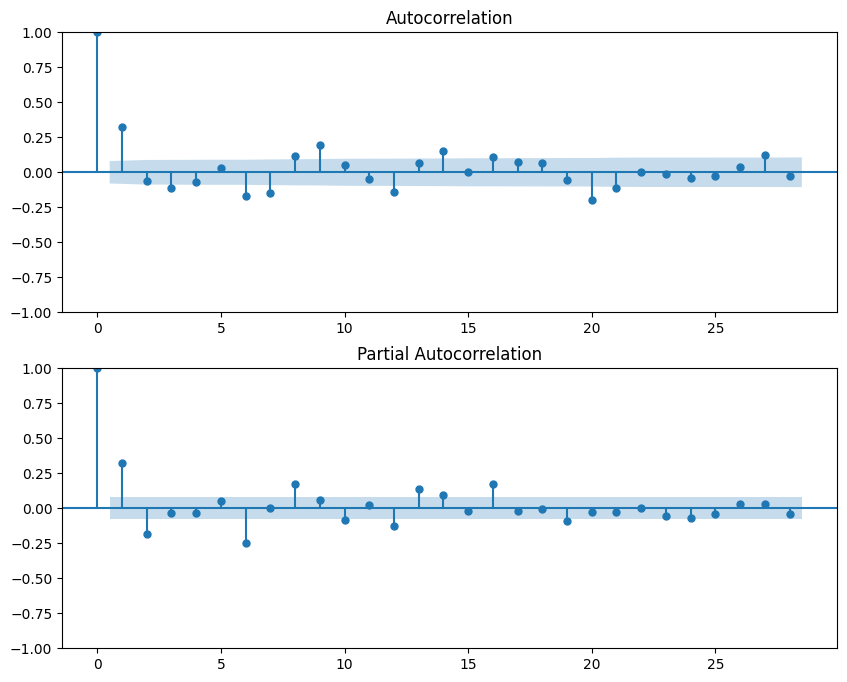

In [9]:

# Plot the ACF and PACF of the differenced time series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(td, ax=ax[0])
plot_pacf(td, ax=ax[1])
plt.show()

In [10]:
#change td to pandas dataframe
td = pd.DataFrame(td)
df["Diff Short Term Interest Rates"] = td["Short Term Interest Rates"]

### Final Dataframe has the following Columns:

In [14]:
for i in df.columns:
    print(f"{i} with {df[i].count()} observations")

Short Term Interest Rates with 600 observations
Personal Income with 600 observations
Industrial Production with 600 observations
Money Supply- Currency/Demand Deposit/Traveller Check with 600 observations
Money Supply- Deposit with 600 observations
Diff Short Term Interest Rates with 599 observations


The desired task is to predict the future interest rate using previous observations. Feel free to use either the original version or the differentiated version (labeled as "Diff Short Term Interest Rates") which exhibits better stationarity.